# Laboration - Covid-19

## Exercise 1. Covid-19 data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### a) Initial analyses

In [2]:
covid19 = pd.read_excel("data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name=8)
covid19 #Exploring both head and tail at once

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2021,37,6266,60,137,1145764,11039,24,7823,52,5.0,14807,1426.599976
85,2021,38,4298,41,101,1150062,11080,21,7844,40,3.9,14847,1430.400024
86,2021,39,4241,41,82,1154303,11121,17,7861,37,3.6,14884,1434.000000
87,2021,40,4141,40,81,1158444,11161,15,7876,42,4.0,14926,1438.099976


In [3]:
#There are no missing values (89 rows/weeks and 89 non-null values).
#The data type is either int64 or float64 and seems to be appropriately used.
covid19.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              89 non-null     int64  
 1   veckonummer                     89 non-null     int64  
 2   Antal_fall_vecka                89 non-null     int64  
 3   Antal_fall_100000inv_vecka      89 non-null     int64  
 4   Antal_fall_100000inv_14dagar    89 non-null     int64  
 5   Kum_antal_fall                  89 non-null     int64  
 6   Kum_fall_100000inv              89 non-null     int64  
 7   Antal_nyaintensivvårdade_vecka  89 non-null     int64  
 8   Kum_antal_intensivvårdade       89 non-null     int64  
 9   Antal_avlidna_vecka             89 non-null     int64  
 10  Antal_avlidna_milj_inv_vecka    89 non-null     float64
 11  Kum_antal_avlidna               89 non-null     int64  
 12  Kum_antal_avlidna_milj_inv      89 non

In [4]:
covid19.describe()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
count,89.000000,89.000000,89.000000,89.000000,89.000000,8.900000e+01,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2020.460674,25.584270,13061.865169,126.011236,251.584270,4.885261e+05,4709.325843,88.606742,4261.741573,167.910112,16.233708,8923.303371,860.923595
std,0.501275,13.713637,14210.652869,137.184472,272.989003,4.559136e+05,4391.041264,83.646662,2609.965149,204.302952,19.765609,5126.703711,493.286226
min,2020.000000,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,14.000000,2179.000000,21.000000,46.000000,7.279100e+04,705.000000,14.000000,2491.000000,17.000000,1.600000,5621.000000,544.299988
50%,2020.000000,25.000000,4608.000000,44.000000,100.000000,3.380260e+05,3273.000000,59.000000,3638.000000,82.000000,7.900000,8135.000000,787.700012
75%,2021.000000,36.000000,25405.000000,246.000000,485.000000,1.044862e+06,10067.000000,153.000000,7348.000000,235.000000,22.799999,14416.000000,1388.900024
max,2021.000000,53.000000,46177.000000,447.000000,869.000000,1.162506e+06,11200.000000,289.000000,7886.000000,664.000000,64.300003,14944.000000,1439.800049


In [5]:
covid19["år"].value_counts() #The data includes 48 weeks from 2020 and 41 weeks for 2021

2020    48
2021    41
Name: år, dtype: int64

### b) Create a "Vecka" column

In [6]:
covid19["veckonummer"] = covid19["år"].astype(str) + "v" + covid19["veckonummer"].astype(str) #Creates a new column with year and week number and overwrites the "veckonummer" column
covid19 = covid19.rename({"veckonummer":"Vecka"}, axis=1).drop("år", axis=1) #Renames the "veckonummer" column to "Vecka" and drops the year column

covid19.head()

,Vecka,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020v6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020v7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020v8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020v9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020v10,211,2,2,225,2,3,3,0,0.0,0,0.0


### c) Plot number of deceased per week

In [7]:
#Check maximum values (to be able to set the ticks for the y-axis)
print(f"Max antal fall per vecka: {covid19['Antal_fall_vecka'].max()}")
print(f"Max antal avlidna per vecka: {covid19['Antal_avlidna_vecka'].max()}")
print(f"Max kumulativt antal fall per vecka: {covid19['Kum_antal_fall'].max()}")

Max antal fall per vecka: 46177
Max antal avlidna per vecka: 664
Max kumulativt antal fall per vecka: 1162506


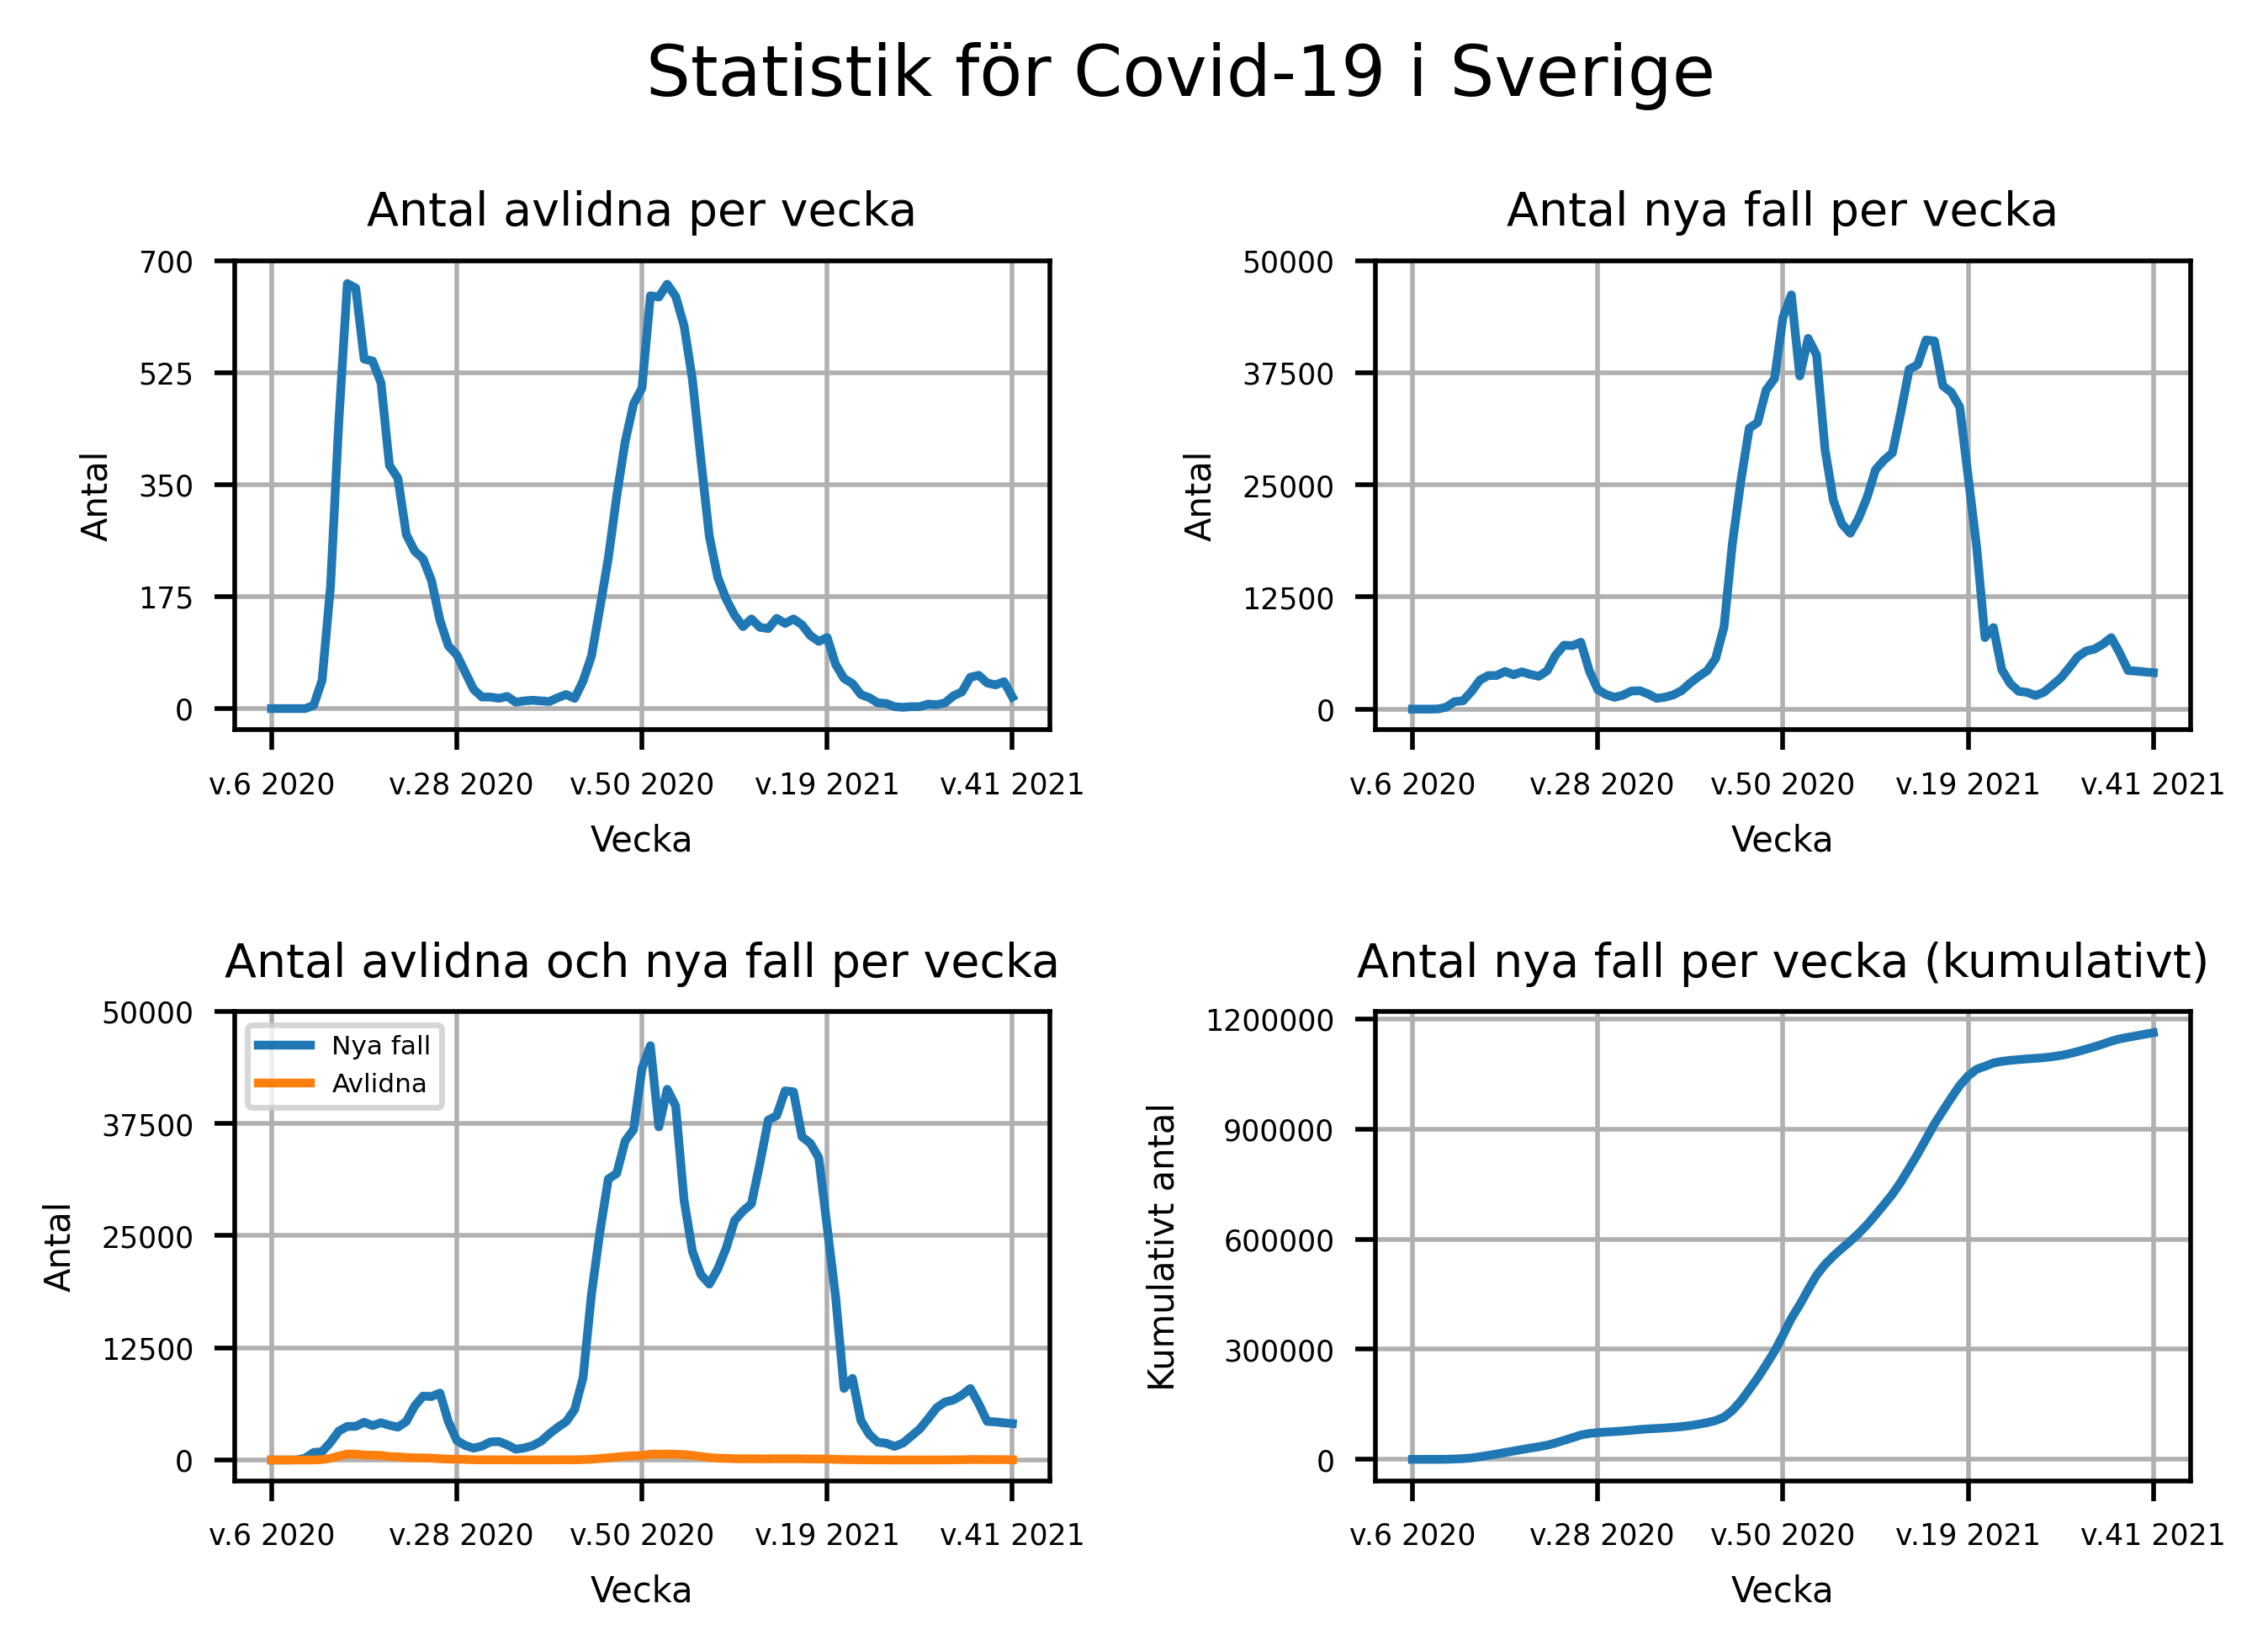

In [8]:
def set_plot_properties_seaborn(plot:sns.lineplot, title:str, y_label:str, y_tick_values:list) -> None:
    '''
    Sets the title, adjusts the ticks and changes the labels for the x and y-axis for a seaborn plot.
    
    Parameters
    ----------
    plot:sns.lineplot
        A seaborn lineplot, with weeks between wk 6 2020 and wk 41 2021.
    title:str
        The title of the plot
    y_label:str
        The label of the y-axis.
    y_tick_values:list
        The tick values for the y-axis.
    '''

    plot.set_title(title, size=8)
    plot.set_xticks([0, 22, 44, 66, 88])
    plot.set_xticklabels(["v.6 2020", " v.28 2020", "v.50 2020", "v.19 2021", "v.41 2021"], size=5)
    plot.set_yticks(y_tick_values)
    plot.set_yticklabels(labels=plot.get_yticks().astype(int), size=5)
    plot.set_xlabel("Vecka", size=6)
    plot.set_ylabel(y_label, size=6)
    plot.grid()
    
#Creates the figure for the subplots
fig, ax = plt.subplots(2,2, dpi=500, facecolor="white")
fig.subplots_adjust(wspace= .4, hspace=.6, top=.85) #Sets the space between plots and the space on top of the plot.
fig.suptitle("Statistik för Covid-19 i Sverige")

#Plots the first subplot
plot1 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[0,0])
set_plot_properties_seaborn(plot1,"Antal avlidna per vecka", "Antal", [0, 175, 350, 525, 700])

#Plots the second subplot
plot2 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[0,1])
set_plot_properties_seaborn(plot2, "Antal nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the third subplot
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_fall_vecka", ax=ax[1,0])
plot3 = sns.lineplot(data=covid19, x="Vecka", y="Antal_avlidna_vecka", ax=ax[1,0])
plot3.legend(labels=["Nya fall", "Avlidna"], fontsize=4.5, loc="upper left")
set_plot_properties_seaborn(plot3, "Antal avlidna och nya fall per vecka", "Antal", [0, 12500, 25000, 37500, 50000])

#Plots the forth subplot
plot4 = sns.lineplot(data=covid19, x="Vecka", y="Kum_antal_fall", ax=ax[1,1])
set_plot_properties_seaborn(plot4, "Antal nya fall per vecka (kumulativt)", "Kumulativt antal", [0, 300000, 600000, 900000, 1200000])

plt.savefig("Visualiseringar/Statistics_for_Covid-19_in_Sweden.png")

In [9]:
def create_plotly_linefig(y_data1:str, y_label:str, title:str, y_data2:str=None, y_data1_legend_label:str=None, y_data2_legend_label:str=None) -> px.line:
        """
        Creates a plotly express line plot from the covid19 dataset.
        
        Parameters
        ----------
        y_data1:str
                The name of the first column to be plotted on the y-axis.
        y_label:str
                The label on the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).
        y_data1_legend_label:str
                The name of the first y-data, to be shown in the legend (default None).
        y_data2_legend_label:str
                The name of the first y-data, to be shown in the legend (default None).     
        
        Returns
        -------
        A plotly express lineplot figure.
        """

        #Creates a list of labels for the ticks (every other week)
        tick_labels = [f"v.{i} 2020" for i in range(6, 54, 2)]
        tick_labels.extend([f"v.{i} 2021" for i in range(1, 42, 2)])

        #Creates a list of the real values (every other week)
        real_labels = [f"2020v{i}" for i in range(6, 54, 2)]
        real_labels.extend([f"2021v{i}" for i in range(1, 42, 2)])

        #Creates labels for hover (all weeks)
        hover_labels = [f"v.{i} 2020" for i in range(6, 54)]
        hover_labels.extend([f"v.{i} 2021" for i in range(1, 42)])

        #Creates a template to be used in the hover (used in update_traces)
        hover_template = '<br>%{customdata}<br>Antal personer: %{y}<br><extra></extra>' #<extra></extra> removes the secondary box
        
        #Creates the figure
        if y_data2 == None:
                fig = px.line(covid19, x="Vecka", y=y_data1, title=title)
                fig.update_layout(showlegend=False) #Removes the legend
        else:
                fig = px.line(
                        covid19, 
                        x="Vecka",      
                        y=[y_data1, y_data2],
                        title=title,
                        hover_data={"Vecka":False, y_data1:False, y_data2:False} #Removes all information about the data from the hover/legend
                        )
                #Adds the two lines in one plot and sets a name that will be shown in the legend.
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data1], name=y_data1_legend_label))
                fig.add_trace(go.Scatter(x=covid19["Vecka"], y=covid19[y_data2], name=y_data2_legend_label))

        #Customise hover
        fig.update_traces(customdata=hover_labels, hovertemplate=hover_template, mode="markers+lines") #hover_labels is assigned to customdata, so that it can be used in the hovertemplate

        #Sets the label of the y-axis and the ticks for the x-axis
        fig.update_layout(
                yaxis=dict(title=y_label),
                xaxis = dict(tickmode = 'array', 
                        tick0 = 0, 
                        dtick = 2, #Show every other tick/week
                        ticktext=tick_labels, #The tick_labels (created above) should be shown
                        tickvals=real_labels #These are the old values that should be overwritten in the plot
                        ))

        return fig

In [118]:
#TODO: Check how to save it in html
plot1 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna i Covid-19 i Sverige (per vecka)")
plot1.show()
plot1.write_html('deceased_per_week.html', auto_open=True)

In [11]:
plot2 = create_plotly_linefig("Antal_fall_vecka", "Antal", "Nya fall av Covid-19 i Sverige (per vecka)")
plot2.show()
plot2.write_html('new_cases.html', auto_open=True)

In [12]:
plot3 = create_plotly_linefig("Antal_avlidna_vecka", "Antal", "Avlidna och nya fall av Covid-19 i Sverige (per vecka)", "Antal_fall_vecka", "Avlidna", "Nya fall")
plot3.show()
plot3.write_html('deceased_and_new_cases.html', auto_open=True)

In [13]:
plot4 = create_plotly_linefig("Kum_antal_fall", "Kumulativt antal", "Antal nya fall i Sverige per vecka (kumulativt)")
plot4.show()
plot4.write_html('cumulative_cases.html', auto_open=True)

## Exercise 2. Vaccination Data

In [14]:
vaccination = pd.read_excel("data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx", sheet_name=5)
vaccination

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal färdigvaccinerade,Andel minst 1 dos,Andel färdigvaccinerade
0,1,Stockholm,114,Upplands Väsby,16-17,1122,671,450,0.598039,0.401070
1,1,Stockholm,114,Upplands Väsby,18-29,6428,4174,3324,0.649347,0.517113
2,1,Stockholm,114,Upplands Väsby,30-39,7088,4976,4341,0.702032,0.612444
3,1,Stockholm,114,Upplands Väsby,40-49,6802,5308,5010,0.780359,0.736548
4,1,Stockholm,114,Upplands Väsby,50-59,6185,5360,5190,0.866613,0.839127
...,...,...,...,...,...,...,...,...,...,...
2605,25,Norrbotten,2584,Kiruna,50-59,3134,2911,2852,0.928845,0.910019
2606,25,Norrbotten,2584,Kiruna,60-69,2768,2596,2537,0.937861,0.916546
2607,25,Norrbotten,2584,Kiruna,70-79,2287,2160,2074,0.944469,0.906865
2608,25,Norrbotten,2584,Kiruna,80-89,1280,1233,1157,0.963281,0.903906


### a) Number of "län" in the data

In [15]:
print(f"There are {len(vaccination['Län_namn'].unique())} 'län' in the dataset.")

There are 21 'län' in the dataset.


### b) Number of "kommuner" in the dataset.

In [16]:
print(f"There are {len(vaccination['Kommun_namn'].unique())} 'kommuner' in the dataset.")

There are 290 'kommuner' in the dataset.


### c) Number of people that are are represented in the data.

In [17]:
no_people_represented = sum(vaccination['Befolkning'])
print(f"There are {no_people_represented} people represented in the data")

There are 8541497 people represented in the data


### d) Number of children, under the age of 16.

In [18]:
print(f"There are about {10427296-no_people_represented} children (under the age of 16) in Sweden.") 

There are about 1885799 children (under the age of 16) in Sweden.


### e) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (two plots)

In [136]:
#Creates a new dataframe to be used for plotting vaccination for each "län"
vaccination_summed = pd.DataFrame(vaccination["Antal färdigvaccinerade"].groupby(vaccination["Län_namn"]).sum())
vaccination_summed["Antal minst 1 dos"] = vaccination["Antal minst 1 dos"].groupby(vaccination["Län_namn"]).sum()
vaccination_summed["Andel färdigvaccinerade"] = vaccination["Andel färdigvaccinerade"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed["Andel minst 1 dos"] = vaccination["Andel minst 1 dos"].groupby(vaccination["Län_namn"]).mean()*100
vaccination_summed

,Antal färdigvaccinerade,Antal minst 1 dos,Andel färdigvaccinerade,Andel minst 1 dos
Län_namn,,,,
Blekinge,110497,114711,80.724895,85.059633
Dalarna,198688,207596,81.844990,86.534151
Gotland,44359,46143,87.282728,90.833365
Gävleborg,193853,205563,79.024386,84.874367
Halland,230634,239400,81.718873,86.018333
Jämtland,90406,95357,80.701877,86.907285
Jönköping,238710,252915,79.700853,85.958028
Kalmar,170670,178030,80.272115,84.599188
Kronoberg,130930,138254,76.953930,82.253200


In [132]:
#Creates a template to be shown in hover
def create_plotly_barfig(y_data1:str, title:str, y_data2:str=None) -> px.bar:
        """
        Creates a plotly express bar plot from the vaccination dataset.
        
        Parameters
        ----------
        y_data1:str
                The name of the first column to be plotted on the y-axis.
        title:str
                The title of the plot.
        y_data2:str
                The name of the second column to be plotted on the y-axis (default None).    
        
        Returns
        -------
        A plotly express barplot figure.
        """        

        if y_data2 == None:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index,      
                        y=y_data1,
                        title=title,
                        labels={"Län_namn":"Län"}
                        )
        else:
                fig = px.bar(
                        vaccination_summed, 
                        x=vaccination_summed.index, 
                        y=[y_data1, y_data2], 
                        barmode="group",
                        title=title,
                        labels={"Län_namn":"Län", "value":"Antal vaccinerade", "variable":"Variabel"}
                        )
        if y_data1 == "Andel minst 1 dos" or y_data1 == "Andel färdigvaccinerade":
                fig.update_layout(
                        yaxis=dict(title="Andel (%)"), 
                        xaxis=dict(title="Län"),
                        )
        else:
                fig.update_layout(
                        yaxis=dict(title="Antal"), 
                        xaxis=dict(title="Län"),
                        )

        return fig      

In [133]:
plot5 = create_plotly_barfig("Andel minst 1 dos", "Andel vaccinerade med minst en dos (per län)")
plot5.show()

In [134]:
plot6 = create_plotly_barfig("Andel färdigvaccinerade", "Andel färdigvaccinerade (per län)")
plot6.show()

### f) Bar chart for number of people vaccinated with at least one dose and fully vaccinated people (one plot)

In [135]:
plot7 = create_plotly_barfig("Antal minst 1 dos", "Antal vaccinerade med minst en dos och antal färdigvaccinerade", "Antal färdigvaccinerade")
plot7.show()

TODO: Save all the plots to html and rename them

## Exercise 3. KPI

1. Does death rate decrease when vaccination increase? One dose and two doses - veckodata riket
2. Does number of cases decrease when vaccination increase? One dose and two doses - veckodata riket
3. Looking at the oldest people, does the death rate continue to decrease or does it increase?
4. Antal intensivvårdade per dag - veckodata riket
5. Något med stadsdelar i Gbg
6. Något med ålder
